In [2]:
import sys
import os
sys.path.append('../src')  # so Python can find your local module

from data.pull_data import fetch_lmp
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


In [55]:
RAW_PATH = "../data/raw/"

rtm_raw = pd.read_csv(os.path.join(RAW_PATH, 'caiso_rtm_test/dataset.csv'))
rtm_raw.head()

,Unnamed: 0,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,OPR_INTERVAL,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,GROUP
0,0,2023-01-01 08:00:00+00:00,2023-01-01T08:05:00-00:00,2023-01-01,1,1,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.0,1
1,1,2023-01-01 08:05:00+00:00,2023-01-01T08:10:00-00:00,2023-01-01,1,2,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.0,1
2,2,2023-01-01 08:10:00+00:00,2023-01-01T08:15:00-00:00,2023-01-01,1,3,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.0,1
3,3,2023-01-01 08:15:00+00:00,2023-01-01T08:20:00-00:00,2023-01-01,1,4,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.0,1
4,4,2023-01-01 08:20:00+00:00,2023-01-01T08:25:00-00:00,2023-01-01,1,5,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.0,1


In [56]:
PROCESSED_PATH = "../data/processed/"

rtm_cleaned = pd.read_csv(os.path.join(PROCESSED_PATH, 'rtm_cleaned_hourly.csv'))
#df.columns = df.columns.to_series().str.join('_')
rtm_cleaned.head()

,INTERVALSTARTTIME_GMT,LMP_CONG_PRC,LMP_ENE_PRC,LMP_LOSS_PRC,LMP_PRC,hour,dayofweek,month,is_weekend,is_night
0,2023-01-01 08:00:00+00:00,0.0,114.298923,-2.352403,111.946518,8.0,6.0,1.0,1.0,0.0
1,2023-01-01 09:00:00+00:00,0.0,107.946913,0.000000,107.946913,9.0,6.0,1.0,1.0,0.0
2,2023-01-01 10:00:00+00:00,0.0,102.325343,0.000000,102.325343,10.0,6.0,1.0,1.0,0.0
3,2023-01-01 11:00:00+00:00,0.0,104.272087,0.000000,104.272087,11.0,6.0,1.0,1.0,0.0
4,2023-01-01 12:00:00+00:00,0.0,112.840600,0.000000,112.840600,12.0,6.0,1.0,1.0,0.0


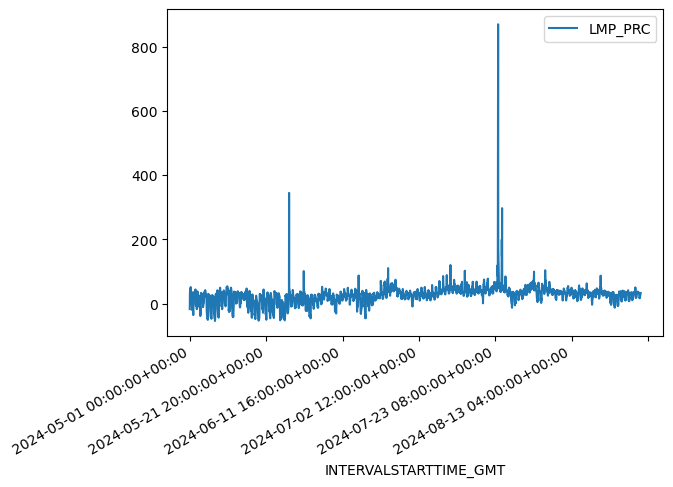

In [59]:
start = '2024-05-01'
end = '2024-09-01'


start_dt = datetime.fromisoformat(start)
end_dt = datetime.fromisoformat(end)

mask = (rtm_cleaned['INTERVALSTARTTIME_GMT'] >= start) & (rtm_cleaned['INTERVALSTARTTIME_GMT'] <= end)

rtm_window = rtm_cleaned[mask]

rtm_window.plot(x='INTERVALSTARTTIME_GMT', y='LMP_PRC')
plt.gcf().autofmt_xdate()

In [62]:
RAW_PATH = "../data/raw/"

dam_raw = pd.read_csv(os.path.join(RAW_PATH, 'caiso_dam/dataset.csv'))
dam_raw.head()

,Unnamed: 0,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,OPR_INTERVAL,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,GROUP
0,0,2023-01-01T08:00:00-00:00,2023-01-01T09:00:00-00:00,2023-01-01,1,0,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,DAM,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,118.46735,1
1,1,2023-01-01T08:00:00-00:00,2023-01-01T09:00:00-00:00,2023-01-01,1,0,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,DAM,MCC,LMP_CONG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.00000,2
2,2,2023-01-01T08:00:00-00:00,2023-01-01T09:00:00-00:00,2023-01-01,1,0,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,DAM,MCE,LMP_ENE_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,121.76724,3
3,3,2023-01-01T08:00:00-00:00,2023-01-01T09:00:00-00:00,2023-01-01,1,0,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,DAM,MCL,LMP_LOSS_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,-3.29989,4
4,4,2023-01-01T08:00:00-00:00,2023-01-01T09:00:00-00:00,2023-01-01,1,0,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,DAM,MGHG,LMP_GHG_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.00000,5


In [61]:
PROCESSED_PATH = "../data/processed/"

dam_cleaned = pd.read_csv(os.path.join(PROCESSED_PATH, 'dam_cleaned_hourly.csv'))
dam_cleaned.head()

,INTERVALSTARTTIME_GMT,LMP_CONG_PRC,LMP_ENE_PRC,LMP_GHG_PRC,LMP_LOSS_PRC,LMP_PRC
0,2023-01-01 08:00:00+00:00,0.0,121.76724,0.0,-3.29989,118.46735
1,2023-01-01 09:00:00+00:00,0.0,116.13963,0.0,-3.01963,113.12000
2,2023-01-01 10:00:00+00:00,0.0,115.43434,0.0,-2.52801,112.90633
3,2023-01-01 11:00:00+00:00,0.0,110.98059,0.0,-2.55255,108.42804
4,2023-01-01 12:00:00+00:00,0.0,109.83079,0.0,-2.46021,107.37058


In [64]:
RAW_PATH = "../data/raw/"

demand_raw = pd.read_csv(os.path.join(RAW_PATH, 'caiso_demand_2DA/dataset.csv'))
demand_raw.head()

,Unnamed: 0,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
0,0,2023-01-01T18:00:00-00:00,2023-01-01T19:00:00-00:00,2,2023-01-01,11,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1334.66,2DA,1
1,1,2023-01-01T15:00:00-00:00,2023-01-01T16:00:00-00:00,2,2023-01-01,8,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1122.25,2DA,1
2,2,2023-01-02T01:00:00-00:00,2023-01-02T02:00:00-00:00,2,2023-01-01,18,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1508.30,2DA,1
3,3,2023-01-01T23:00:00-00:00,2023-01-02T00:00:00-00:00,2,2023-01-01,16,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1363.75,2DA,1
4,4,2023-01-01T22:00:00-00:00,2023-01-01T23:00:00-00:00,2,2023-01-01,15,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1339.01,2DA,1


In [65]:
PROCESSED_PATH = "../data/processed/"

demand_cleaned = pd.read_csv(os.path.join(PROCESSED_PATH, 'demand_cleaned_hourly.csv'))
print(demand_cleaned.columns)
demand_cleaned.head()

Index(['INTERVALSTARTTIME_GMT', 'AVA', 'AVRN', 'AZPS', 'BANC', 'BANCMID',
       'BANCRDNG', 'BANCRSVL', 'BANCSMUD', 'BANCWASN', 'BCHA', 'BPAT',
       'CA ISO-TAC', 'EPE', 'IPCO', 'LADWP', 'D-TAC', 'NEVP', 'NWMT', 'PACE',
       'PACW', 'PGE', 'PGE-TAC', 'PNM', 'PSEI', 'SCE-TAC', 'SCL', 'SDGE-TAC',
       'SRP', 'TEPC', 'TIDC', 'TPWR', 'VEA-TAC', 'WALC', 'WALCAEPCO',
       'WALCDSW'],
      dtype='object')


,INTERVALSTARTTIME_GMT,AVA,AVRN,AZPS,BANC,BANCMID,BANCRDNG,BANCRSVL,BANCSMUD,BANCWASN,...,SCL,SDGE-TAC,SRP,TEPC,TIDC,TPWR,VEA-TAC,WALC,WALCAEPCO,WALCDSW
0,2023-01-01 08:00:00+00:00,1185.871667,NaN,2762.453333,1452.916667,221.223333,90.506667,107.703333,991.462500,40.771667,...,1008.340833,2028.898333,2632.740000,1053.349167,237.224167,485.034167,64.547500,NaN,NaN,NaN
1,2023-01-01 09:00:00+00:00,1164.358333,NaN,2719.446667,1397.607500,212.263333,87.640833,103.218333,950.286667,42.617500,...,984.745833,1945.740000,2588.067500,1042.676667,232.620833,472.771667,63.946667,NaN,NaN,NaN
2,2023-01-01 10:00:00+00:00,1147.382500,NaN,2687.799167,1357.398333,207.339167,85.894167,99.563333,924.633333,38.550833,...,972.111667,1870.350833,2552.485000,1028.437500,225.564167,466.020000,64.369167,NaN,NaN,NaN
3,2023-01-01 11:00:00+00:00,1145.910833,NaN,2683.603333,1342.097500,203.254167,85.846667,98.161667,911.231667,41.934167,...,958.016667,1837.237500,2534.845000,1030.612500,220.252500,463.481667,65.558333,NaN,NaN,NaN
4,2023-01-01 12:00:00+00:00,1156.926667,NaN,2728.672500,1360.279167,202.195833,86.387500,98.434167,930.008333,41.669167,...,953.022500,1815.005000,2559.763333,1051.540833,219.604167,467.844167,66.856667,NaN,NaN,NaN


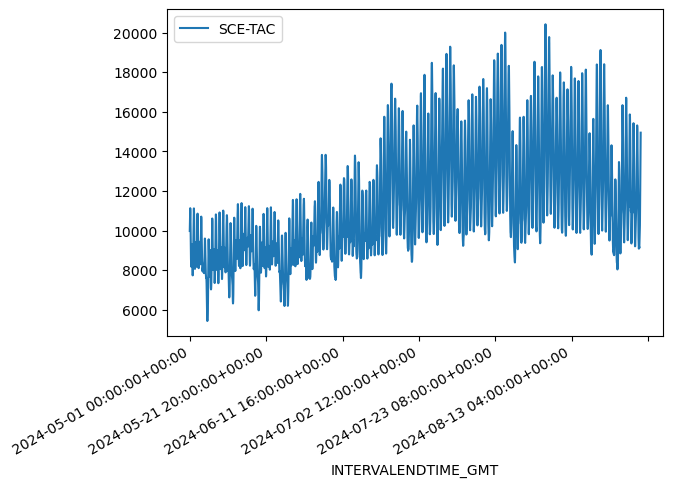

In [43]:
start = '2024-05-01'
end = '2024-09-01'


start_dt = datetime.fromisoformat(start)
end_dt = datetime.fromisoformat(end)

mask = (demand_cleaned['INTERVALENDTIME_GMT'] >= start) & (demand_cleaned['INTERVALENDTIME_GMT'] <= end)

demand_window = demand_cleaned[mask]

demand_window.plot(x='INTERVALENDTIME_GMT', y='SCE-TAC')
plt.gcf().autofmt_xdate()

In [148]:
RAW_PATH = "../data/raw/"

demand_raw = pd.read_csv(os.path.join(RAW_PATH, 'caiso_rtpd_prc/dataset.csv'))
demand_raw.head()

,Unnamed: 0,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
0,0,2023-01-01T08:00:00-00:00,2023-01-01T08:15:00-00:00,2023-01-01,1,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,114.91000,1,1
1,1,2023-01-01T09:00:00-00:00,2023-01-01T09:15:00-00:00,2023-01-01,2,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,107.84404,1,1
2,2,2023-01-01T10:00:00-00:00,2023-01-01T10:15:00-00:00,2023-01-01,3,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,107.69120,1,1
3,3,2023-01-01T11:00:00-00:00,2023-01-01T11:15:00-00:00,2023-01-01,4,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,109.12880,1,1
4,4,2023-01-01T12:00:00-00:00,2023-01-01T12:15:00-00:00,2023-01-01,5,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,109.24880,1,1


In [144]:
import requests
import zipfile
import io
import re

base_url = "https://oasis.caiso.com/oasisapi/SingleZip?"

params = {
    'queryname':'PRC_RTPD_LMP',
    'startdatetime': '20250102T00:00-0000',
    'enddatetime': '20250105T00:00-0000',
    'market_run_id': 'RTPD',
    'resultformat': '6',
    'version': '1',
    'node': 'TH_SP15_GEN-APND',
    'XML_DATA_ITEM' : 'LMP_PRC'
}

#params = {
#    'queryname':'PRC_INTVL_LMP',
#    'startdatetime': '20250102T00:00-0000',
#    'enddatetime': '20250105T00:00-0000',
#    'market_run_id': 'RTM',
#    'resultformat': '6',
#    'version': '1',
#    'node': 'TH_SP15_GEN-APND',
#    #'XML_DATA_ITEM' : 'LMP_PRC',
#}

    #'node': 'TH_SP15_GEN-APND',
    #'TAC_AREA_NAME': 'SCE-TAC',
    #'XML_DATA_ITEM' : 'SYS_FCST_15MIN_MW'
    #'queryname':'PRC_RTPD_LMP',

#params = {
#    'queryname':'SLD_FCST',
#    'startdatetime': '20250102T00:00-0000',
#    'enddatetime': '20250105T00:00-0000',
#    'market_run_id': 'RTM',
#    'resultformat': '6',
#    'version': '1',
#    'TAC_AREA_NAME': 'SCE-TAC',
#    'XML_DATA_ITEM' : 'SYS_FCST_15MIN_MW'
#}


#params = {
#    'queryname':'SLD_FCST',
#    'startdatetime': '20250102T00:00-0000',
#    'enddatetime': '20250105T00:00-0000',
#    'market_run_id': 'RTM',
#    'resultformat': '6',
#    'version': '1',
#    'TAC_AREA_NAME': 'SCE-TAC',
#    'XML_DATA_ITEM' : 'SYS_FCST_5MIN_MW'
#}

#params = {
#    'queryname':'PRC_LMP',
#    'startdatetime': '20250102T00:00-0000',
#    'enddatetime': '20250105T00:00-0000',
#    'market_run_id': 'DAM',
#    'resultformat': '6',
#    'version': '1',
#}


resp = requests.get(base_url, params=params, timeout=15)
resp.raise_for_status()
headers = resp.headers["content-disposition"]

if re.search(r"\.xml\.zip;$", headers):
    print("No data available for this query.")

In [145]:
print(resp.headers)

{'Content-Disposition': 'inline; filename=20250101_20250104_PRC_RTPD_LMP_RTPD_20250625_12_51_26_v1.zip;', 'Content-Type': 'application/x-zip-compressed', 'Date': 'Wed, 25 Jun 2025 19:51:26 GMT', 'Keep-Alive': 'timeout=60', 'Connection': 'keep-alive', 'Set-Cookie': 'BIGipServerprod-oasisapi-int=3214218668.10318.0000; path=/; Httponly; Secure, TS010350a5=019d5a8e0ca71171c5d335be859ed8ab409819fd928f4d7ec7c607f6f5e49727632b159ca54338ed50b63ed006e961f694082dff4da707c3dba14fc49ef45ff3682688e150; Path=/; Domain=.oasis.caiso.com', 'Transfer-Encoding': 'chunked'}


In [146]:
def get_df(
    response,
    parse_dates=False,
    sort_values=['INTERVALSTARTTIME_GMT'],
    reindex_columns=None,
    #parse_dates: Optional[Union[List[int], bool]] = False,
    #sort_values: Optional[List[str]] = None,
    #reindex_columns: Optional[List[str]] = None,
) -> pd.DataFrame:

    """Convert response to datframe

    Converts requests.response to pandas.DataFrame

    Args:
        r : requests response object
        parse_dates (bool, list): which columns to parse dates if any
        sort_values(list): which columsn to sort by if any

    Returns:
        df (pandas.DataFrame): pandas dataframe
    """

    with io.BytesIO() as buffer:
        try:
            buffer.write(response.content)
            buffer.seek(0)
            z = zipfile.ZipFile(buffer)

        except zipfile.BadZipFile as e:
            print("Bad zip file", e)

        else:
            csv = z.open(z.namelist()[0])  # ignores all but first file in zip
            df = pd.read_csv(csv, parse_dates=parse_dates)

            #df = df.rename(columns={"PRC": "MW"})

            if sort_values:
                df = df.sort_values(sort_values).reset_index(drop=True)

            if reindex_columns:
                df = df.reindex(columns=reindex_columns)

    return df

In [147]:
df = get_df(resp)
#print(df['XML_DATA_ITEM'].unique())
#for n in df['NODE']:
#    if 'SP' in n:
#        print(n)
df

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
0,2025-01-02T00:00:00-00:00,2025-01-02T00:15:00-00:00,2025-01-01,17,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,29.57922,1,1
1,2025-01-02T00:15:00-00:00,2025-01-02T00:30:00-00:00,2025-01-01,17,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,32.40715,2,1
2,2025-01-02T00:30:00-00:00,2025-01-02T00:45:00-00:00,2025-01-01,17,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,40.90524,3,1
3,2025-01-02T00:45:00-00:00,2025-01-02T01:00:00-00:00,2025-01-01,17,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,43.00461,4,1
4,2025-01-02T01:00:00-00:00,2025-01-02T01:15:00-00:00,2025-01-01,18,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,43.88268,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2025-01-04T22:45:00-00:00,2025-01-04T23:00:00-00:00,2025-01-04,15,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,0.64710,4,4
284,2025-01-04T23:00:00-00:00,2025-01-04T23:15:00-00:00,2025-01-04,16,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,-3.98268,1,4
285,2025-01-04T23:15:00-00:00,2025-01-04T23:30:00-00:00,2025-01-04,16,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,19.02688,2,4
286,2025-01-04T23:30:00-00:00,2025-01-04T23:45:00-00:00,2025-01-04,16,TH_SP15_GEN-APND,TH_SP15_GEN-APND,TH_SP15_GEN-APND,RTPD,LMP,LMP_PRC,TH_SP15_GEN-APND,ALL_APNODES,0,35.24670,3,4
